<a href="https://colab.research.google.com/github/indrochoco/Playstore-app-Review-analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
path ='/content/drive/MyDrive/almabetter/capstone project/Copy of Play Store Data.csv'
df = pd.read_csv(path)

In [4]:
path_1='/content/drive/MyDrive/almabetter/capstone project/Copy of User Reviews.csv'
df_1 = pd.read_csv(path_1)

In [64]:
df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df_1.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


# **Rating column data type is String format here, so we need to check the rating and convert it to FLoat data type for better analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [ ]:
df.describe()

In [ ]:
df_1.info()

In [ ]:
df_1.describe()

In [ ]:
df.shape

(10350, 13)

In [ ]:
df_1.shape

(64295, 5)

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# **Let's clean the data first** -- Data cleaining

## First droping the duplicate rows 

In [65]:
df.drop_duplicates(subset=['App','Category'], keep='first', inplace=True)

In [66]:
df.Category.unique()
#Basically there should not be "1.9" in the catergory 

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [67]:
index = df["Rating"].argmax() 
df.iloc[index , 1: ] = df.iloc[index , 1: ].shift()
df.loc[index ,"Rating"] = float(df.loc[index ,"Rating"])
df.loc[index ,"Reviews"] = float(df.loc[index ,"Reviews"])

In [68]:
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

**So,  lets take a look of Genres**

In [ ]:
df.Genres.unique()


**Look like genres are pretty much okay**

In [ ]:
type(df.Rating[0])

float

***Now Price, Rating and review column's data type should be changed, for better analysis***

In [69]:
df.Rating = df.Rating.astype('float')

In [70]:
df.Reviews = df.Reviews.astype('int')

In [71]:
df.Price = df.Price.str.replace('$','')
df.Price= df.Price.astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


## **Installs column should be modified properly , as per ease of analysis**
Data Organizing

In [72]:
df.Installs = df.Installs.str.replace('+','')

In [73]:
df.Installs = df.Installs.str.replace(',','')

In [74]:
df.Installs = df.Installs.astype('int')

In [17]:
# MAX installs rows are
df[df.Installs==df.Installs.max()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


##*Now Searching the most installed (which is above 10 billions downloads) app's Category*

In [19]:
max_installs= df[df.Installs==df.Installs.max()]




**Okay!!!!**
*These categories are the popular among users*

In [ ]:
max_installs.Category.unique()

array(['BOOKS_AND_REFERENCE', 'COMMUNICATION', 'ENTERTAINMENT', 'GAME',
       'SOCIAL', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'TOOLS',
       'PRODUCTIVITY', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'FAMILY'],
      dtype=object)

In [ ]:
max_installs_good_rating= max_installs.groupby('Category')['Rating'].mean().sort_values(ascending=False)

In [ ]:
max_installs_good_rating

## Adding some visualization Between category vs Rating.
these graph shows that, how rating varies with category , **although all these apps are maximun installed.**

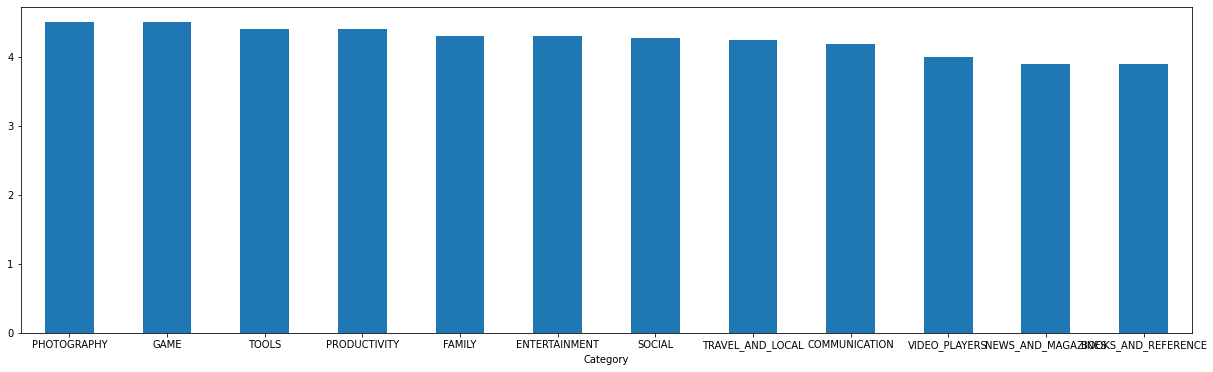

In [ ]:
plt.rcParams['figure.figsize'] = (21, 6)
ax = max_installs_good_rating.plot.bar( rot=0)

## By observing both graph , most installed and good rating geners or categories are Photography and Arcade/Game. Tools and Productivity are followed behind. 

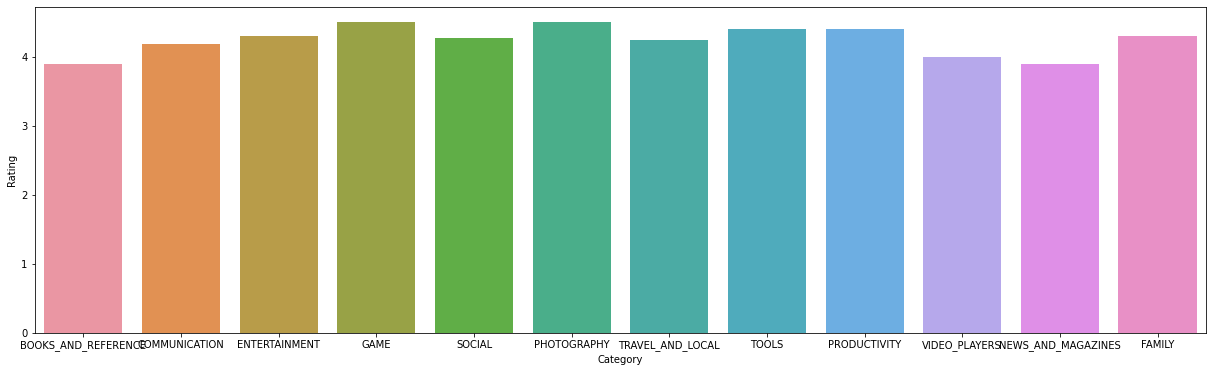

In [ ]:

ax = sns.barplot(x="Category", y="Rating", data=max_installs,ci=0)

Analysis the content Rating , as per category and individually

TOp 10 category

In [21]:
content_rating_df = df.groupby(['Category','Content Rating'])['Content Rating'].count().unstack()

In [22]:
content_rating_df

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
ART_AND_DESIGN,NaN,60.0,1.0,NaN,3.0,NaN
AUTO_AND_VEHICLES,NaN,83.0,1.0,NaN,1.0,NaN
BEAUTY,NaN,45.0,2.0,3.0,3.0,NaN
BOOKS_AND_REFERENCE,NaN,198.0,4.0,3.0,17.0,NaN
BUSINESS,NaN,405.0,1.0,1.0,13.0,NaN
COMICS,2.0,26.0,3.0,6.0,19.0,NaN
COMMUNICATION,NaN,281.0,NaN,8.0,27.0,NaN
DATING,NaN,17.0,NaN,145.0,9.0,NaN
EDUCATION,NaN,112.0,3.0,3.0,1.0,NaN


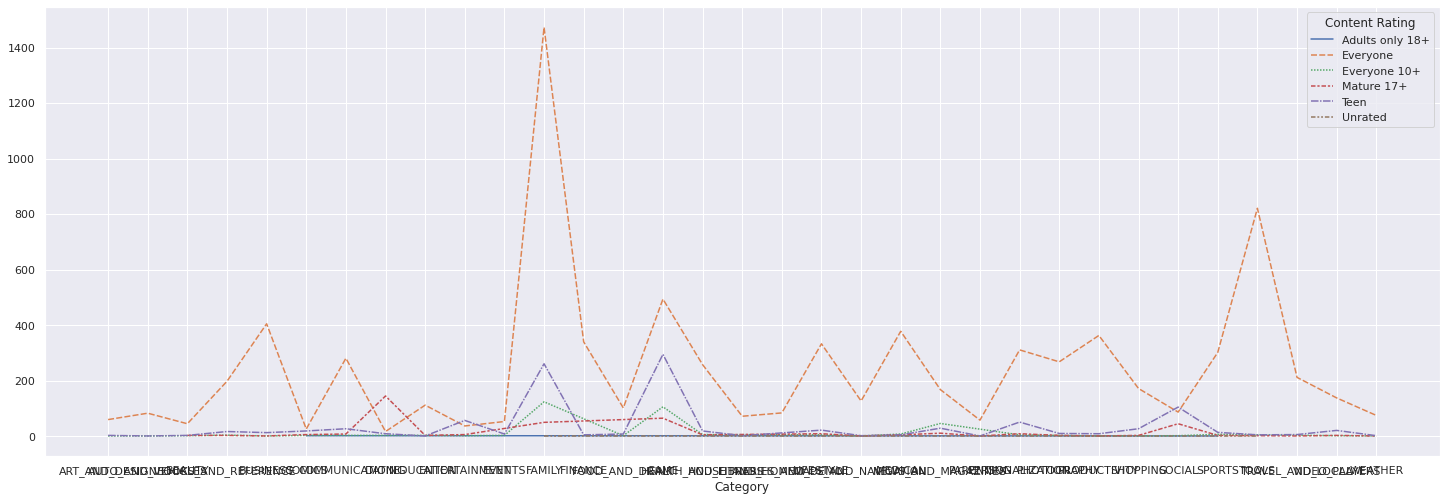

In [24]:
sns.set(rc={'figure.figsize':(25,8.27)})
sns.lineplot(data=content_rating_df)

## Comparing number of Installs , ratings and reviews between the Free and paid apps

In [31]:
Comparing_type= df[(~df.Type.isna()) & (~df.Rating.isna()) & (~df.Reviews.isna())& (~df.Installs.isna())].groupby('Type').agg({'Rating':'mean','Reviews':'mean','Installs':'mean'})

In [32]:
Comparing_type

,Rating,Reviews,Installs
Type,,,
Free,4.168000,301417.445342,1.040714e+07
Paid,4.261056,10934.800330,9.546614e+04


Comparing Installs between free and paid apps

Text(0.5, 0, 'Type of apps')

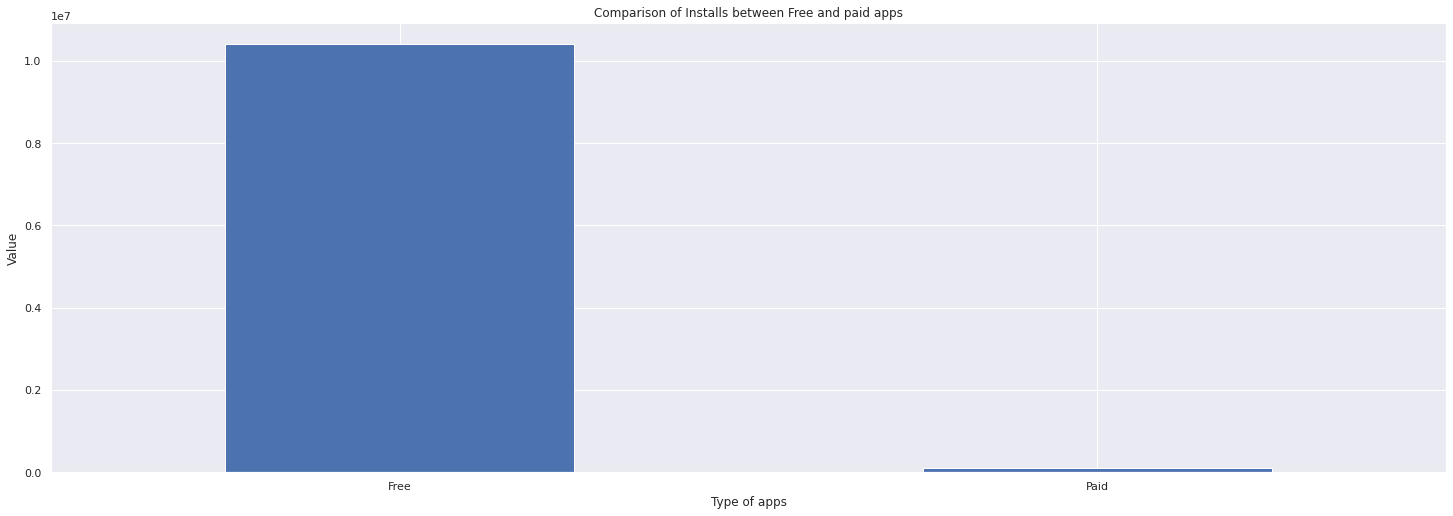

In [37]:
Comparing_type['Installs'].plot.bar(rot=0)
plt.title('Comparison of Installs between Free and paid apps')
plt.ylabel('Value')
plt.xlabel('Type of apps')

Comparing Reviews between free and paid apps

Text(0.5, 0, 'Type of apps')

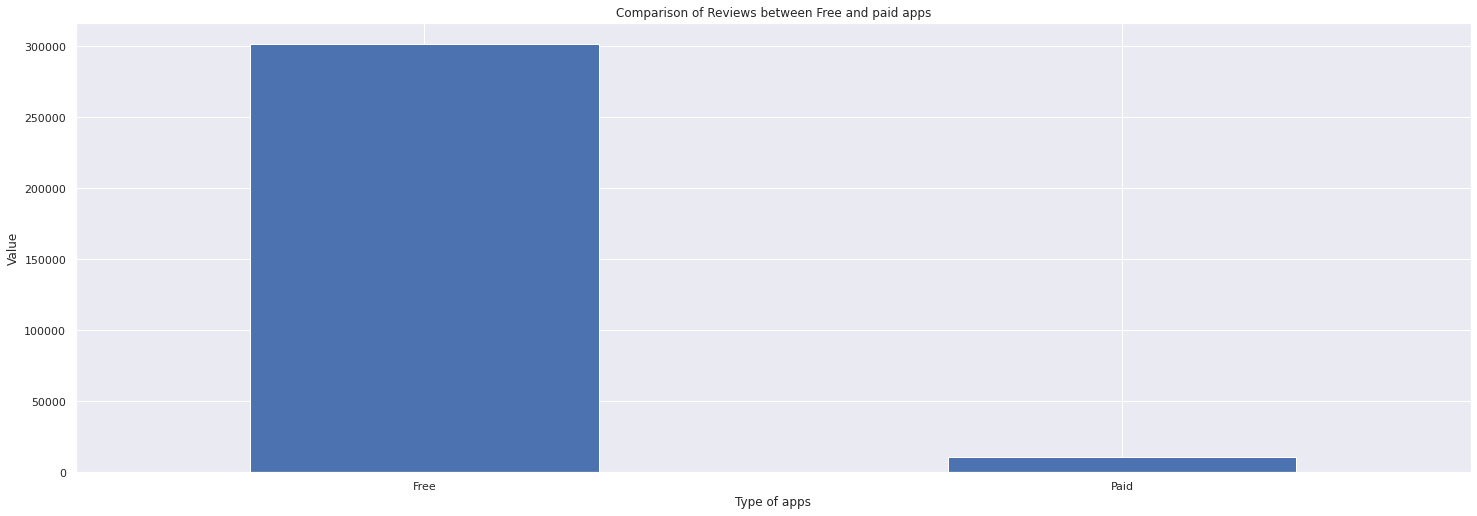

In [38]:
Comparing_type['Reviews'].plot.bar(rot=0)
plt.title('Comparison of Reviews between Free and paid apps')
plt.ylabel('Value')
plt.xlabel('Type of apps')

## Paid top 5 category by installation

In [39]:
paid_top_category= df[df.Type=='Paid'].groupby('Category')['Installs'].mean().reset_index().sort_values(by='Installs',ascending=False)

In [41]:
paid_top_category

,Category,Installs
12,GAME,256097.134146
6,EDUCATION,150500.000000
9,FAMILY,114328.724324
29,WEATHER,101500.000000
7,ENTERTAINMENT,100000.000000
21,PHOTOGRAPHY,98881.052632
15,LIFESTYLE,62058.421053
25,SPORTS,51825.625000
22,PRODUCTIVITY,50430.535714
4,COMMUNICATION,50372.222222


Text(0.5, 0, 'apps')

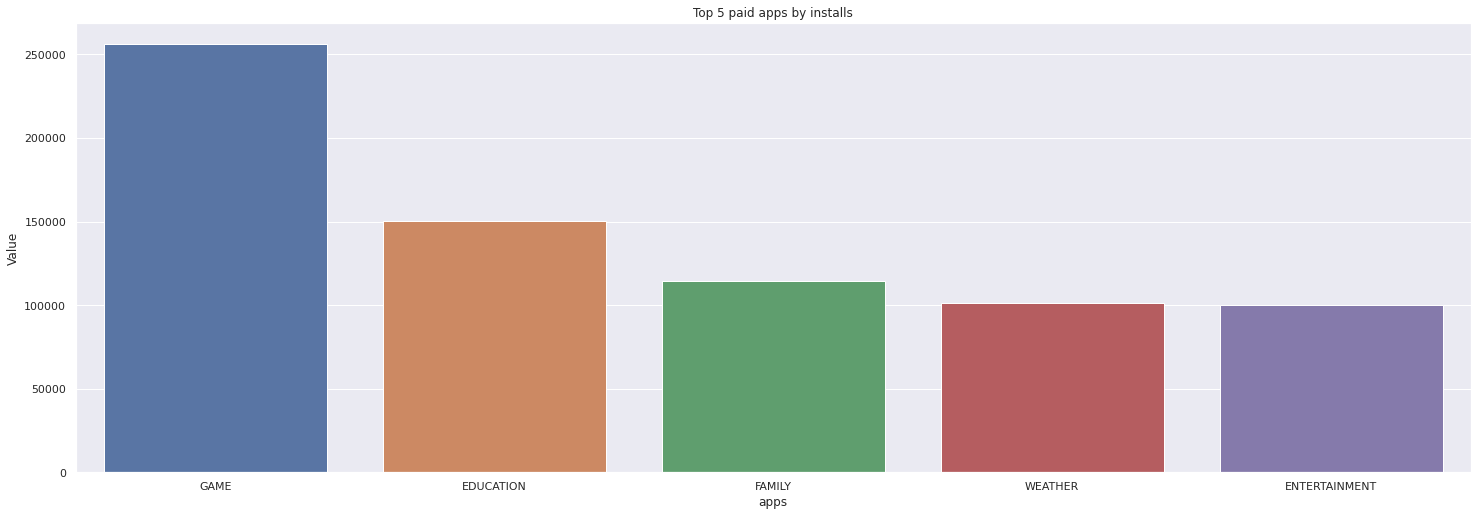

In [42]:
ax = sns.barplot(x="Category", y="Installs", data=paid_top_category[:5],ci=0)
plt.title('Top 5 paid apps by installs')
plt.ylabel('Value')
plt.xlabel('apps')

Top 5 category of most expensive apps

In [76]:
top5_expensive= df[df.Type=='Paid'].groupby('Category')['Price'].mean().reset_index().sort_values(by='Price',ascending=False)

Text(0.5, 0, 'apps')

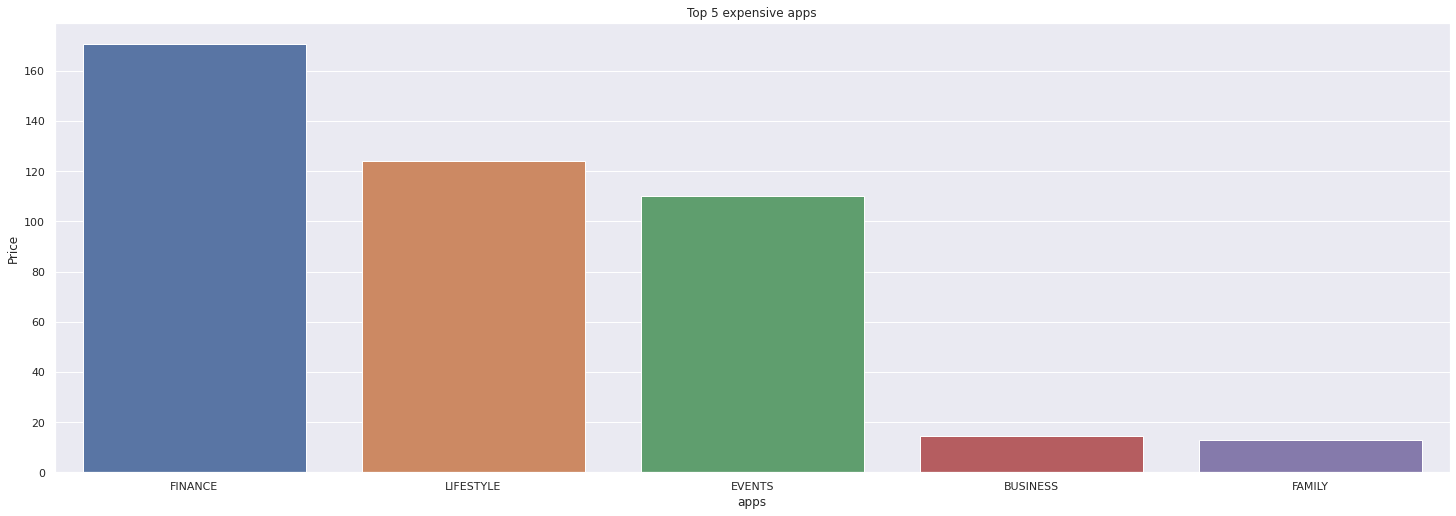

In [79]:
ax = sns.barplot(x="Category", y="Price", data=top5_expensive[:5],ci=0)
plt.title('Top 5 expensive apps')
plt.ylabel('Price')
plt.xlabel('apps')

In [ ]:
# converting to date format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [ ]:
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10350, dtype: datetime64[ns]

## Converting app size to bytes

In [43]:
def convert_bytes(i):
  if i.count('M')==1:
    return float(i[:-1])*1024*1024
  elif i.count('K')==1:
    return float(i[:-1])*1024
  else:
    return 0
    

In [44]:
df['Size']=df.Size.apply(convert_bytes)

In [45]:
df.Size

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10836    55574528.0
10837     3774873.6
10838     9961472.0
10839           0.0
10840    19922944.0
Name: Size, Length: 9745, dtype: float64


### *   Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.
### *   Polarity, also known as orientation is he emotion expressed in the sentence. It can be positive, neagtive or neutral.
### *   Subjectivity is when text is an explanatory article which must be analysed in context




In [ ]:
df_1.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


review isna karo

In [ ]:
df_2= df_1[~df_1.Translated_Review.isna()]

In [ ]:
df_2.shape

(37427, 5)

In [ ]:
df_2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,count
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,194
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,194
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,194
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,194
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000,194
...,...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,21
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,21
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,21
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,21


## Most reviewed App are:

In [ ]:
df_2["count"] = df_2.groupby('App')['App'].transform('count')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
 df_2.App.value_counts()[0:10]

Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
Candy Crush Saga                  240
Garena Free Fire                  222
8 Ball Pool                       219
Calorie Counter - Macros          200
10 Best Foods for You             194
Name: App, dtype: int64

In [ ]:
review_count= df_2.groupby('App')['App'].count().sort_values(ascending=False)

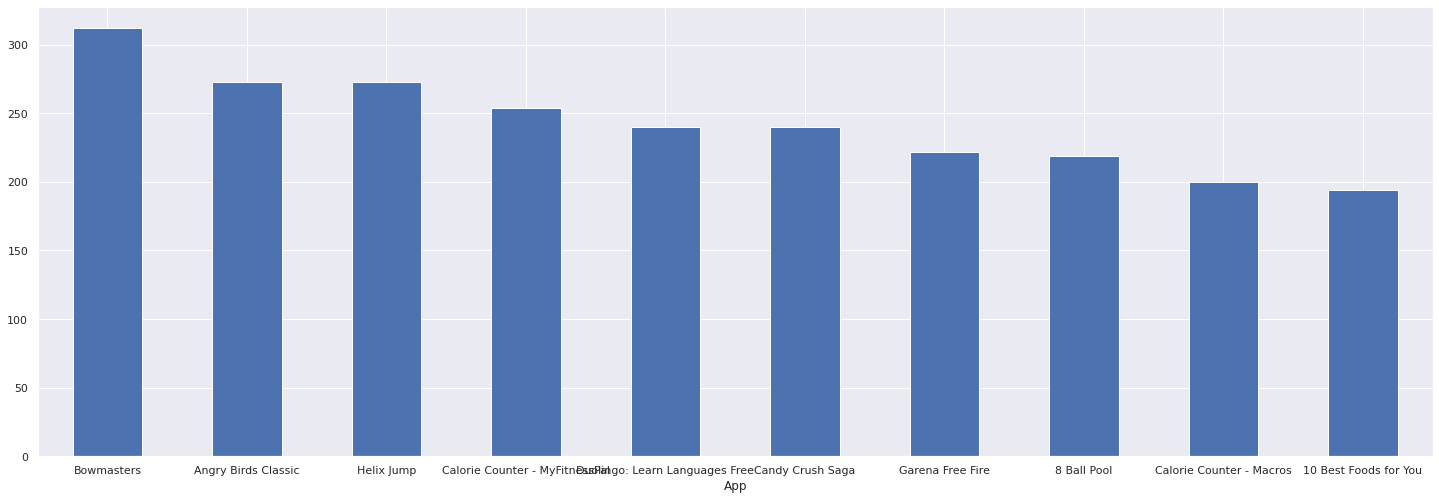

In [ ]:
review_count[:10].plot.bar(rot=0)

Let's take a look of Most 8 reviewed App's Sentiment_Polarity and 	Sentiment_Subjectivity

In [ ]:
df_3= df_2[(df_2.App=='Bowmasters') | (df_2.App=='Helix Jump') | (df_2.App=='Angry Birds Classic') | (df_2.App=='Calorie Counter - MyFitnessPal') | (df_2.App=='Duolingo: Learn Languages Free') | (df_2.App=='Candy Crush Saga') | (df_2.App=='Garena Free Fire') | (df_2.App=='8 Ball Pool')]

In [ ]:
# Most reviewed app total sentiment
sentiment= df_3.groupby('App').agg({'Sentiment_Polarity':'sum'}).sort_values(by='Sentiment_Polarity',ascending=False).reset_index()

In [ ]:
sentiment.rename(columns = {'Sentiment_Polarity' : 'Total_Sentiment'},inplace=True)

In [ ]:
sentiment

,App,Total_Sentiment
0,Calorie Counter - MyFitnessPal,54.996746
1,Duolingo: Learn Languages Free,48.097857
2,Helix Jump,27.208676
3,Bowmasters,19.161620
4,Garena Free Fire,15.797047
5,Candy Crush Saga,7.456288
6,8 Ball Pool,0.274190
7,Angry Birds Classic,-2.057709


Text(0.5, 1.0, 'Most reviewed app total sentiment')

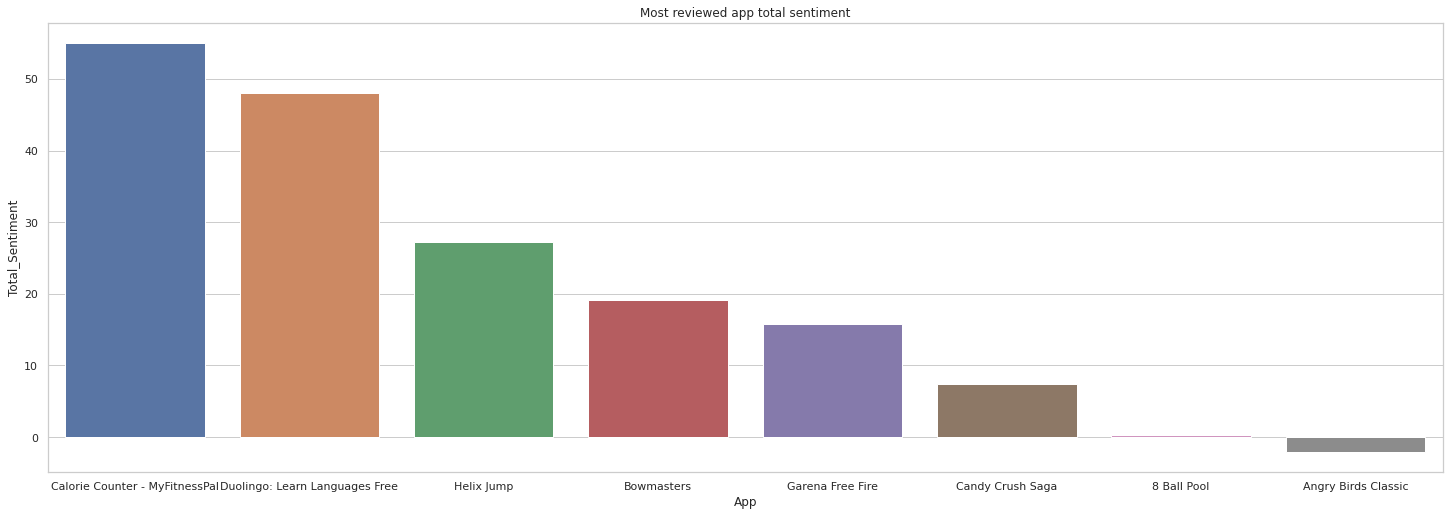

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="App", y="Total_Sentiment", data=sentiment)
ax.set_title('Most reviewed app total sentiment')

## Taking top 3 reviewed app (count wise top 3 )

Let's Visualise the Sentiment_Polarity and 	Sentiment_Subjectivity of top 3 reviwed app

In [ ]:
top3_app=df_3[(df_3.App=='Bowmasters') | (df_3.App=='Angry Birds Classic') | (df_3.App=='Helix Jump')]

In [ ]:
color_dict = dict({'Bowmasters':'brown',
                  'Helix Jump':'green',
                  'Angry Birds Classic': 'orange'})

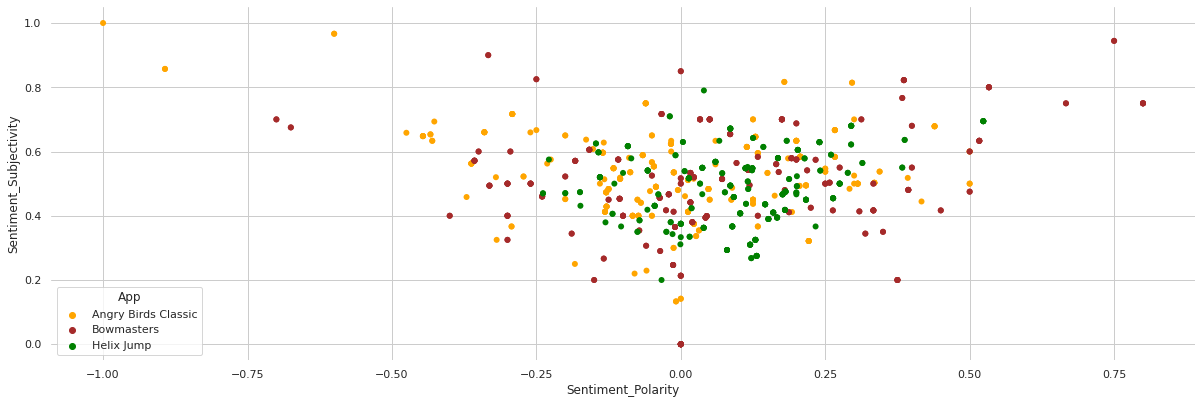

In [ ]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(20.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Sentiment_Polarity", y="Sentiment_Subjectivity",
                sizes=(1, 8), linewidth=0, hue='App',
                data=top3_app, ax=ax,palette=color_dict,legend='full')


In [ ]:
df_2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
df_nonnull= df[(~df.Rating.isna()) & (~df.Reviews.isna())]

In [ ]:
user_review =df_2.groupby('App').agg({'Sentiment_Polarity':'sum','Sentiment_Subjectivity':'mean'})

In [ ]:
merged_df = pd.merge(df_nonnull, user_review, how='inner',left_on='App',right_on='App') 

In [ ]:
merged_df.rename(columns = {'Sentiment_Polarity':'Total_sentiment','Sentiment_Subjectivity':'mean_sentiment_subjectivity'}, inplace = True)

In [ ]:
merged_df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Total_sentiment,mean_sentiment_subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.716667,0.641540
1,Coloring book moana,FAMILY,3.9,974,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.716667,0.641540
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,24.163460,0.523447
3,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,5000000,Free,0.0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,1.650595,0.679226


In [ ]:
merged_df.describe()

,Rating,Reviews,Installs,Price,Total_sentiment,mean_sentiment_subjectivity
count,848.000000,8.480000e+02,8.480000e+02,848.000000,848.000000,848.000000
mean,4.284670,8.540621e+05,2.761252e+07,0.096002,8.018972,0.492809
std,0.311186,4.076859e+06,1.093692e+08,1.253946,8.897086,0.084359
min,2.600000,1.140000e+02,1.000000e+03,0.000000,-9.726559,0.000000
25%,4.100000,8.447750e+03,1.000000e+06,0.000000,1.977006,0.453669
50%,4.300000,4.268700e+04,5.000000e+06,0.000000,6.478120,0.497616
75%,4.500000,2.170692e+05,1.000000e+07,0.000000,11.358680,0.537632
max,4.900000,7.815831e+07,1.000000e+09,29.990000,91.322167,0.916667


In [ ]:
merged_df.corr()

,Rating,Reviews,Installs,Price,Total_sentiment,mean_sentiment_subjectivity
Rating,1.000000,0.099144,0.033961,-0.011201,0.200219,0.210269
Reviews,0.099144,1.000000,0.451171,-0.015912,-0.049858,-0.000236
Installs,0.033961,0.451171,1.000000,-0.019291,0.004793,0.009851
Price,-0.011201,-0.015912,-0.019291,1.000000,0.047888,-0.004315
Total_sentiment,0.200219,-0.049858,0.004793,0.047888,1.000000,0.183318
mean_sentiment_subjectivity,0.210269,-0.000236,0.009851,-0.004315,0.183318,1.000000


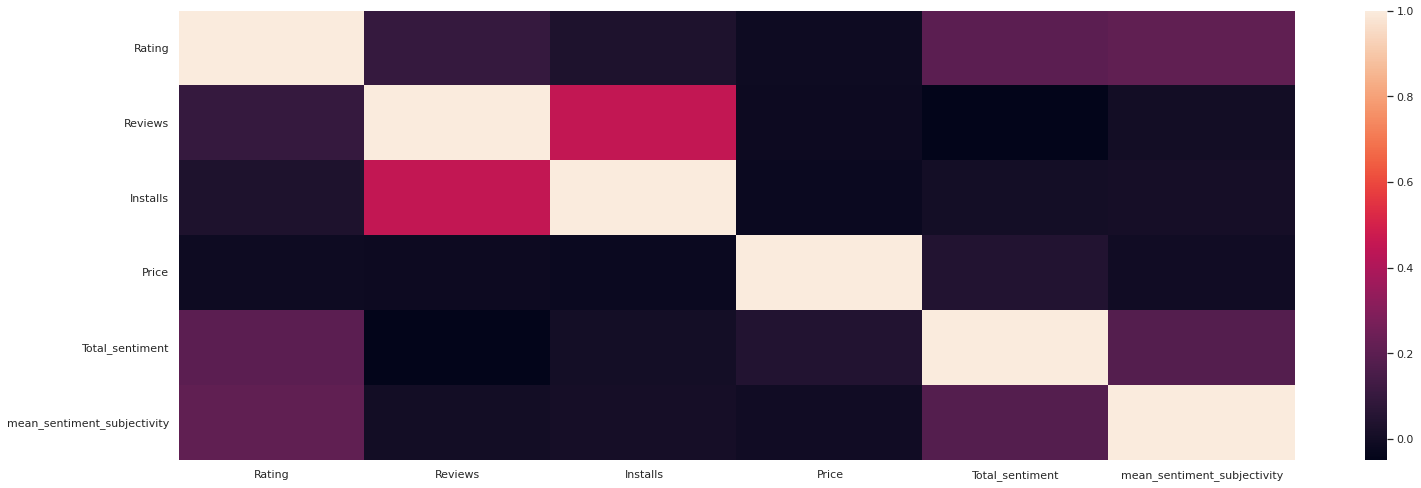

In [ ]:
sns.heatmap(merged_df.corr())

In [ ]:
# keeping the rows which are above the mean of sentiment polarity, installs, reviews and which apps rating greater than 4 .
mean_df= merged_df[(merged_df.Installs > 5.000000e+06) & (merged_df.Reviews>	6.619400e+04) & (merged_df.Total_sentiment>7.001728) &(merged_df.Rating>4)]

## These 10 Apps are the top most Installed,reviewd, whose rating also above 4, as well as user response were positivly (according to the sentiment). positive sentiment are also high of these apps.

In [ ]:
mean_df.sort_values(by=['Installs','Reviews','Rating','Total_sentiment'],ascending=[False,False,False,False])[:10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Total_sentiment,mean_sentiment_subjectivity
550,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,28.174331,0.501894
649,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,9.893660,0.492744
330,Candy Crush Saga,GAME,4.4,22426677,74M,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,7.456288,0.456293
331,Candy Crush Saga,FAMILY,4.4,22419455,74M,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,7.456288,0.456293
739,Dropbox,PRODUCTIVITY,4.4,1861310,61M,500000000,Free,0.0,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device,17.961120,0.443636
336,Clash Royale,GAME,4.6,23133508,97M,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,11.410923,0.489236
337,Clash Royale,FAMILY,4.6,23125280,97M,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,11.410923,0.489236
651,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759663,15M,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up,7.241549,0.457077
128,Duolingo: Learn Languages Free,FAMILY,4.7,6294400,Varies with device,100000000,Free,0.0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device,48.097857,0.470215
127,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,Varies with device,100000000,Free,0.0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device,48.097857,0.470215


# Conclusion